In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("CAR_PRICE_T3.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
### Checking for null data 

df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#checking list of columns
df.columns.to_list()


['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [6]:
#Dropping car_id since its unnecessary

df=df.drop("car_ID",axis= 1 )


In [7]:
#to check simple statistic 
print("the length of the data is : ",len(df))
df.describe()


the length of the data is :  205


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#combining carlength + carwidth + carheight as car_volume
df["car_volume"] = df["carlength"] * df["carwidth"] * df["carheight"]

df = df.drop(columns=["carlength","carwidth","carheight"])

In [9]:
#Removing Outliers 
numerical_columns = df.select_dtypes(exclude=['object']).columns

def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

df = remove_outliers(df, numerical_columns)
df_copy = df 


#Categorical Variable

In [10]:
## Working with categorical columns 


## CarName ##
df.select_dtypes(include=["object"])
print(df["CarName"].value_counts())
print("\n ")
print (" We have 102 variation for 139 dataset. It seems that CarName format is Car_Brand *space* Car_type  We will be using Car Brand instead of car type to gave more generalized view")
df["CarBrand"] = df["CarName"].str.split(" ").str[0]

##droping the CarName Columns
df = df.drop(columns = ["CarName"],axis =1 )


toyota corona          5
toyota corolla         5
mazda 626              3
toyota mark ii         3
honda accord           2
                      ..
maxda rx3              1
isuzu D-Max V-Cross    1
isuzu MU-X             1
honda civic (auto)     1
volvo diesel           1
Name: CarName, Length: 104, dtype: int64

 
 We have 102 variation for 139 dataset. It seems that CarName format is Car_Brand *space* Car_type  We will be using Car Brand instead of car type to gave more generalized view


In [11]:
## fueltype
print (df["fueltype"].value_counts())
print(" \n")
print("It seems that the option always gas, and hence there is no other variation and other distinguishable categories, hence we will drop the columns")

df = df.drop(columns = ["fueltype"],axis = 1 )


gas    142
Name: fueltype, dtype: int64
 

It seems that the option always gas, and hence there is no other variation and other distinguishable categories, hence we will drop the columns


In [12]:
##aspiration
print (df["aspiration"].value_counts())

## we will use get_dummies for this 


std      128
turbo     14
Name: aspiration, dtype: int64


In [13]:
## door_number

door_number_replacement = {"two" : 2 ,
                           "four" : 4}

df = df.replace({"door_number":door_number_replacement})

print("we are replacing door because it can be represented as number /")


we are replacing door because it can be represented as number /


In [14]:
##carbody

df["carbody"].unique()
## we will use dummies for this 


array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
df["drivewheel"].unique()
## we will use dummies for this 


array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
print(df["enginelocation"].unique())

df = df.drop(columns = ["enginelocation"], axis = 1 )


print(" \n")
print("We will drop this because no other variation and other distinguishable categories, hence we will drop the columns")


['front']
 

We will drop this because no other variation and other distinguishable categories, hence we will drop the columns


In [17]:
print(df["enginetype"].unique())
#we will use one_hot_encoding for this 


['dohc' 'ohcv' 'ohc' 'rotor' 'l']


In [18]:
print(df["cylindernumber"].unique())

cylindernumber_replacement = {"four" : 4,
                            "six" : 6,
                            "five": 5,
                            "two" : 2 }

df = df.replace({"cylindernumber" : cylindernumber_replacement})

print("\n")
print("We replace cylindernumber from string to integer")


['four' 'six' 'five' 'two']


We replace cylindernumber from string to integer


In [19]:
print(df["fuelsystem"].unique())

#we willuse dummies for this 


['mpfi' '2bbl' '1bbl' 'spfi' '4bbl' 'spdi']


In [20]:
#Final dataset 
df.head()


,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_volume,CarBrand
0,3,std,two,convertible,rwd,88.6,2548,dohc,4,130,...,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,alfa-romero
1,3,std,two,convertible,rwd,88.6,2548,dohc,4,130,...,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,alfa-romero
2,1,std,two,hatchback,rwd,94.5,2823,ohcv,6,152,...,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,alfa-romero
3,2,std,four,sedan,fwd,99.8,2337,ohc,4,109,...,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,audi
4,2,std,four,sedan,4wd,99.4,2824,ohc,5,136,...,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,audi


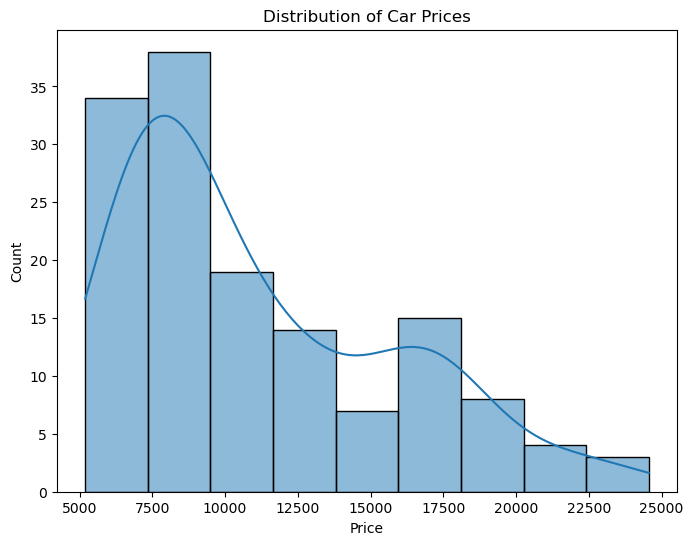

In [21]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

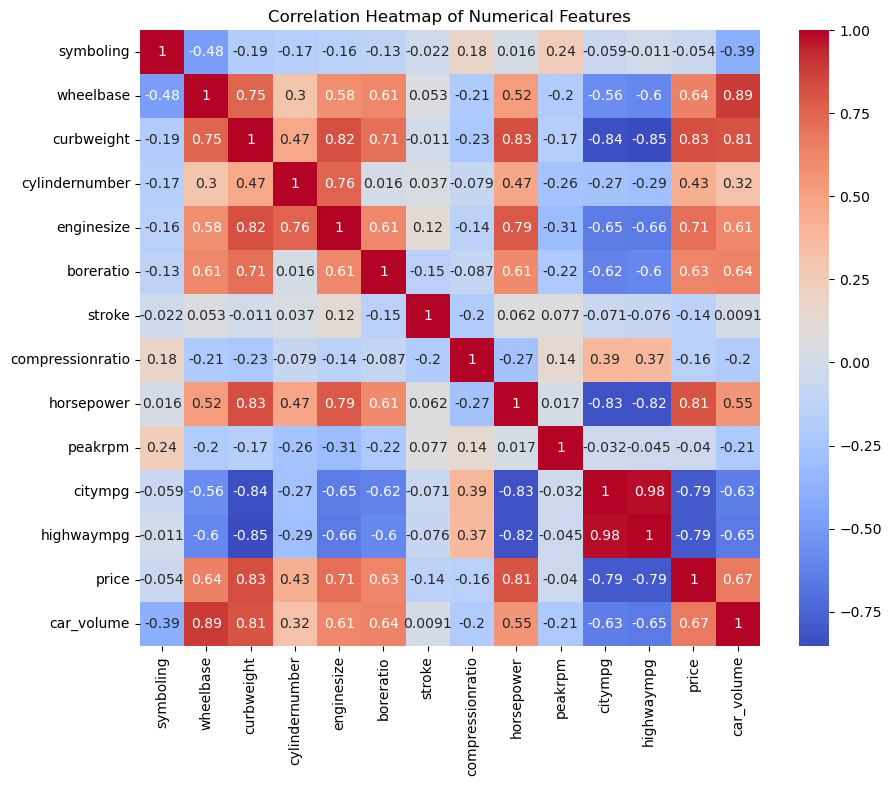

In [22]:
# Visualizing the correlation between numerical features
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

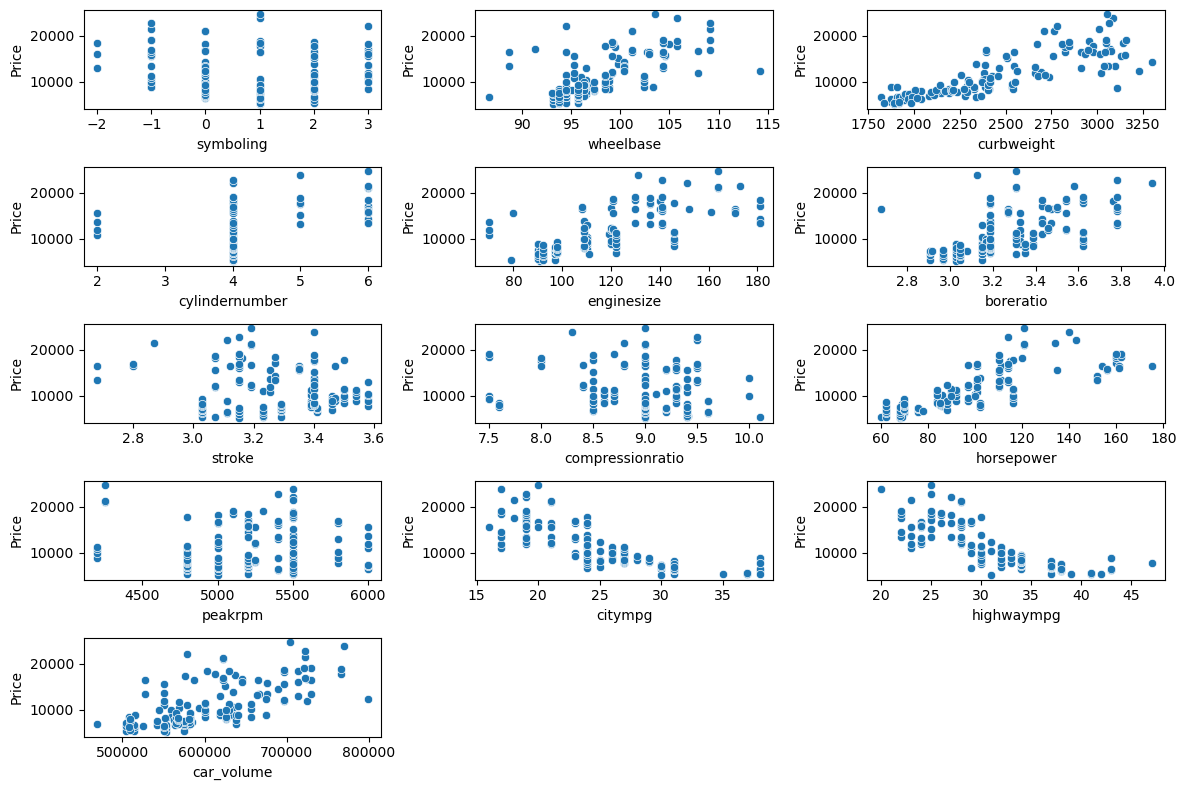

In [23]:
# Visualizing the relationship between numerical features and the target variable
numerical_cols = df.select_dtypes(exclude=['object']).drop('price', axis=1).columns
num_plots = len(numerical_cols)
num_rows = (num_plots - 1) // 3 + 1  # Calculate the number of rows needed

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i+1)  # Adjust the number of columns to 3
    sns.scatterplot(x=col, y='price', data=df)
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

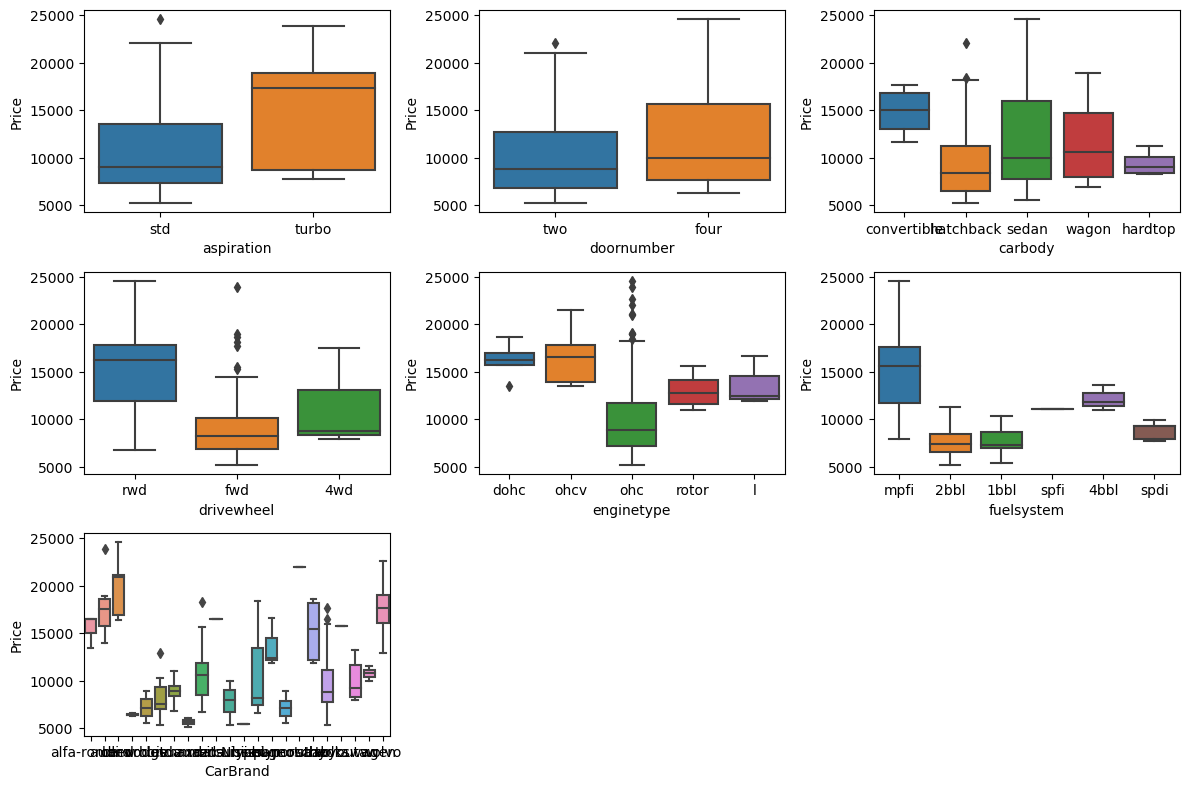

In [24]:
# Visualizing the relationship between categorical features and the target variable
categorical_cols = df.select_dtypes(include=['object']).columns
num_features = len(categorical_cols)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=col, y='price', data=df)
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric = df.select_dtypes(exclude=["object"])
numeric = numeric.drop("price", axis=1)
dropped_vars = []

for i in range(14):
    vif = pd.DataFrame()
    vif["Variable"] = numeric.columns
    vif["VIF"] = [variance_inflation_factor(numeric.values, i) for i in range(numeric.shape[1])]
    if (vif["VIF"].max()) >= 10:
        new_columns = vif.sort_values(by="VIF", ascending=False)[1:]['Variable'].unique().tolist()
        print(vif.sort_values(by="VIF", ascending=False))
        print("\n \n \n \n \n ")
        dropped_vars.append(vif.sort_values(by="VIF", ascending=False).iloc[0, 0])
        numeric = numeric[new_columns]

final_columns = vif["Variable"].unique().tolist()
print(vif)


            Variable          VIF
1          wheelbase  2538.552755
5          boreratio  1451.428865
11        highwaympg   975.885042
10           citympg   716.015608
4         enginesize   540.197824
7   compressionratio   469.835539
12        car_volume   453.892316
2         curbweight   425.036125
6             stroke   415.502016
3     cylindernumber   393.146819
9            peakrpm   302.362244
8         horsepower    76.135014
0          symboling     2.781941

 
 
 
 
 
            Variable         VIF
1         highwaympg  965.142750
0          boreratio  870.130342
2            citympg  710.406742
4   compressionratio  466.192887
6         curbweight  409.555126
3         enginesize  392.833195
5         car_volume  341.765923
9            peakrpm  302.341806
8     cylindernumber  274.643939
7             stroke  269.995388
10        horsepower   75.976001
11         symboling    2.550245

 
 
 
 
 
            Variable         VIF
0          boreratio  743.966750
2   com

In [26]:
df = df.select_dtypes(include=["object"]).join(df[final_columns])
df = df.join(df_copy["price"])


In [27]:
##get_dummies for categorical variabel
categorical_columns = df.select_dtypes(include=["object"]).columns


In [28]:
for i in categorical_columns : 
    dummies_creator = pd.get_dummies(df[i],drop_first= True, prefix = i )
    df = df.join(dummies_creator)
    df=df.drop(columns=[i])

In [29]:
def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df.columns:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )
  return scaled_columns


df_new = build_min_max_scaler(df.drop("price",axis = 1 ))
df = df_new.join(df["price"])



In [30]:
X = df.drop("price",axis = 1 )
y = df["price"]


In [31]:
X = df.drop("price",axis = 1 )
y = df["price"]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 15062001 )


In [32]:
pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
from pycaret.regression import *
s=setup(data=df,target='price')

,Description,Value
0,Session id,1496
1,Target,price
2,Target type,Regression
3,Original data shape,"(142, 42)"
4,Transformed data shape,"(142, 42)"
5,Transformed train set shape,"(99, 42)"
6,Transformed test set shape,"(43, 42)"
7,Numeric features,41
8,Preprocess,True
9,Imputation type,simple


In [34]:
cm=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1327.4783,3573620.4675,1806.0174,0.7805,0.1476,0.1159,0.3160
rf,Random Forest Regressor,1377.5671,3878464.6300,1890.4033,0.7757,0.1506,0.1186,0.3880
catboost,CatBoost Regressor,1460.1890,3862893.8662,1888.8635,0.7665,0.1505,0.1292,1.2640
ada,AdaBoost Regressor,1461.1210,4282219.5048,1997.8765,0.7447,0.1606,0.1299,0.2890
et,Extra Trees Regressor,1477.4790,3936310.3444,1923.0610,0.7413,0.1596,0.1313,0.3780
xgboost,Extreme Gradient Boosting,1494.9406,4612070.1875,2045.9755,0.7301,0.1661,0.1302,0.4750
ridge,Ridge Regression,1629.6880,4755407.2000,2044.2351,0.6747,0.1805,0.1538,0.1530
br,Bayesian Ridge,1637.9824,5042039.0625,2083.5558,0.6608,0.1907,0.1547,0.1580
huber,Huber Regressor,1603.2077,5336819.3379,2125.2169,0.6605,0.2008,0.1491,0.1940
llar,Lasso Least Angle Regression,1628.6835,5297423.5125,2147.8221,0.6450,0.1906,0.1538,0.1630


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [35]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

summary = results.summary()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              131.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                    7.09e-51
Time:                        18:33:33   Log-Likelihood:                         -918.96
No. Observations:                 106   AIC:                                      1914.
Df Residuals:                      68   BIC:                                      2015.
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [36]:
y_pred = results.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
mpe = abs (np.mean((y_test - y_pred) / y_test)) * 100
print("Mean Squarred Error :" , mse)
print("Mean Percentage Error : ",mpe)


Mean Squarred Error : 1405.608129168285
Mean Percentage Error :  1.7609218975077847


In [37]:
summary = results.summary()
tables = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)
coefficients_table = tables[0]
sorted_table = coefficients_table.sort_values(by='P>|t|', ascending=False)


In [38]:
tables = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)
coefficients_table = tables[0]
sorted_table = coefficients_table.sort_values(by='P>|t|', ascending=False)
pd.DataFrame(sorted_table)

,coef,std err,t,P>|t|,[0.025,0.975]
symboling,2.135529e+02,1.612877e+03,0.132,0.895,-3.004892e+03,3.431998e+03
enginetype_ohc,3.586556e+02,1.423000e+03,0.252,0.802,-2.480897e+03,3.198208e+03
citympg,-8.486254e+02,2.638864e+03,-0.322,0.749,-6.114396e+03,4.417145e+03
doornumber_two,-5.564162e+02,6.485680e+02,-0.858,0.394,-1.850613e+03,7.377810e+02
fuelsystem_spdi,2.325383e+03,2.425430e+03,0.959,0.341,-2.514488e+03,7.165253e+03
drivewheel_fwd,1.236450e+03,1.251586e+03,0.988,0.327,-1.261052e+03,3.733951e+03
CarBrand_mercury,3.598426e+03,2.921939e+03,1.232,0.222,-2.232212e+03,9.429065e+03
CarBrand_chevrolet,3.660422e+03,2.707455e+03,1.352,0.181,-1.742219e+03,9.063064e+03
CarBrand_maxda,3.500576e+03,2.399687e+03,1.459,0.149,-1.287924e+03,8.289076e+03
enginetype_rotor,2.091359e+03,1.359011e+03,1.539,0.128,-6.205060e+02,4.803224e+03


# Model

In [39]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [40]:
# Generate a random regression dataset (example)
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [42]:
# Create an Extra Trees regression model
model = ExtraTreesRegressor()

In [43]:
# Train the model on the training data
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [44]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [45]:
# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6848.676063875214
